In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


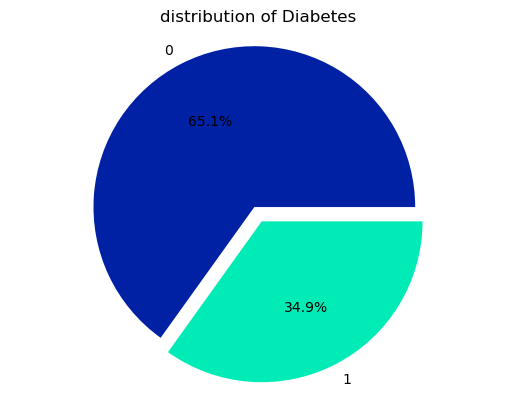

In [4]:
Diabetes_column = df.Outcome.value_counts()

# pie chart for target column
plt.pie(Diabetes_column, labels = Diabetes_column.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#0121A4","#00EBB5"])
plt.title("distribution of Diabetes")
plt.axis("equal")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

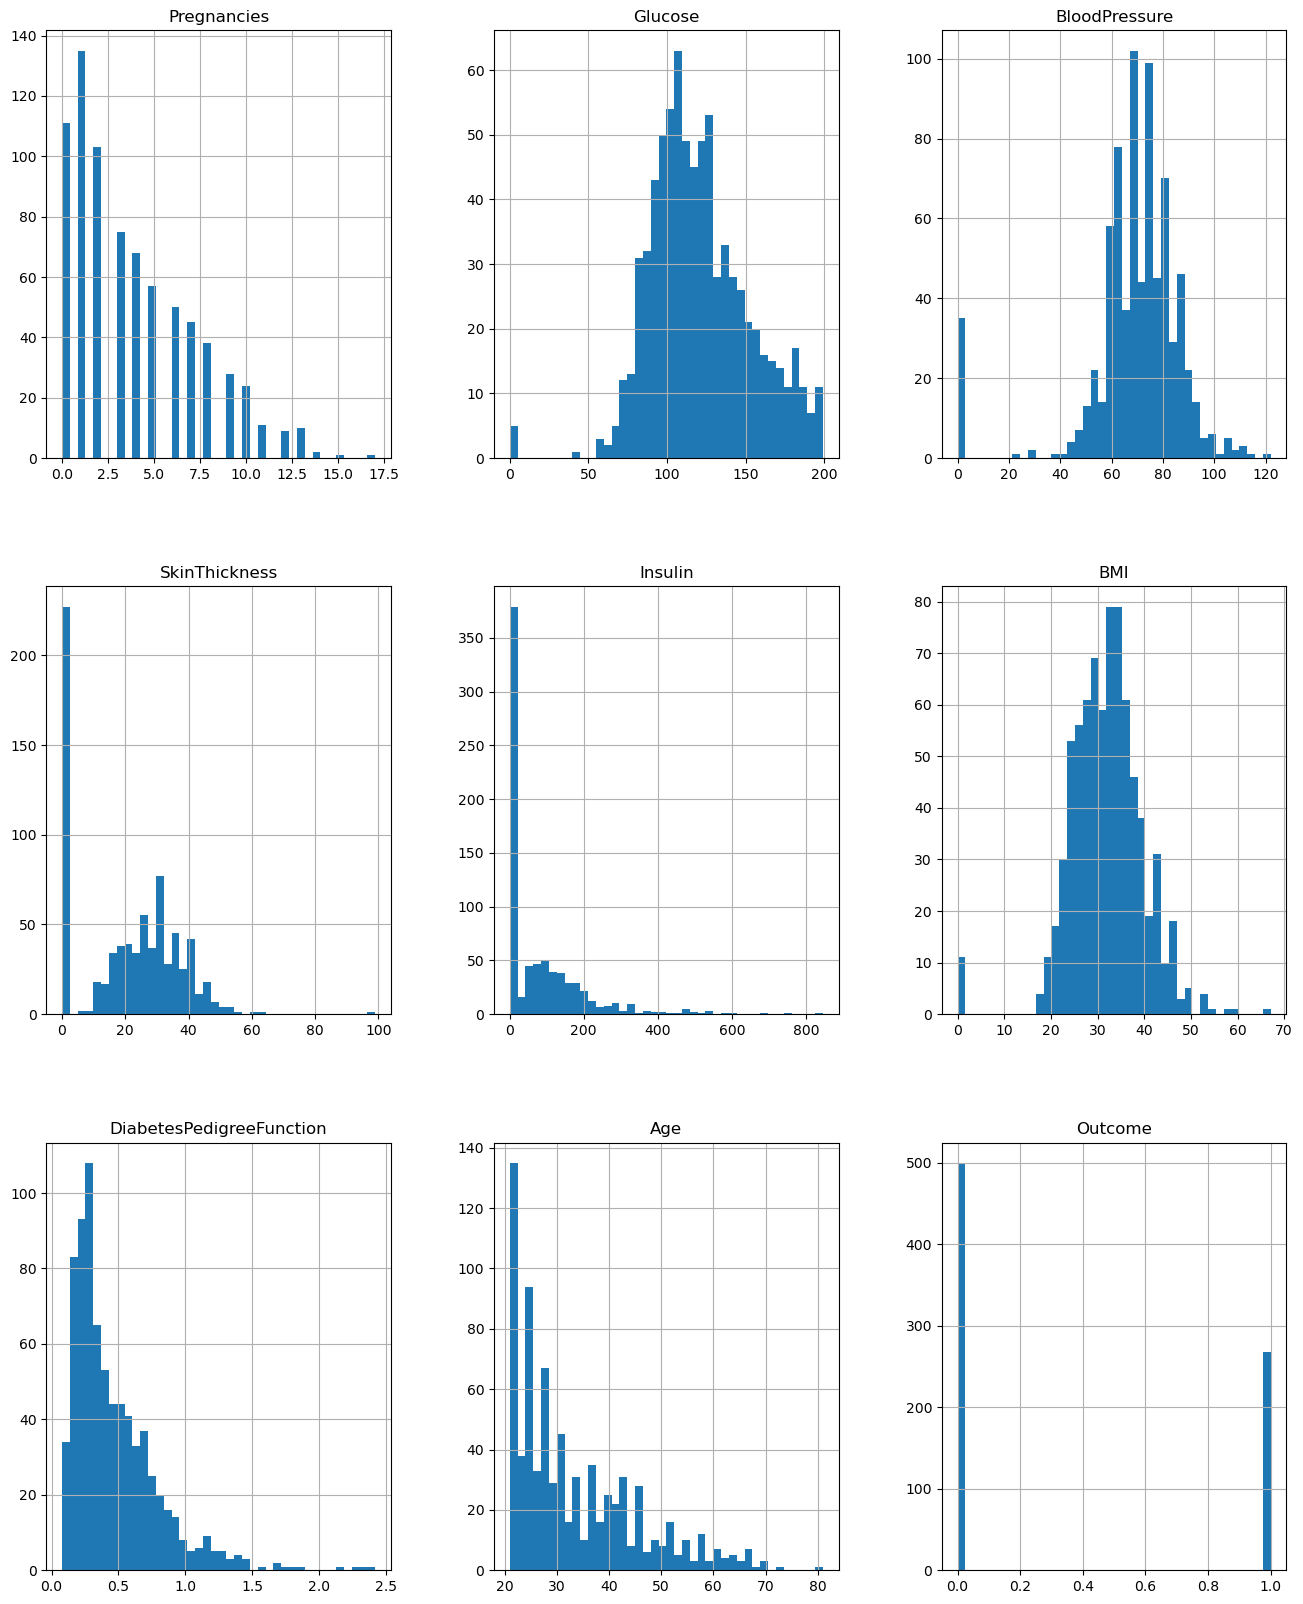

In [8]:
df.hist(figsize=(16, 20), bins=40)#, xlabelsize=6, ylabelsize=6)

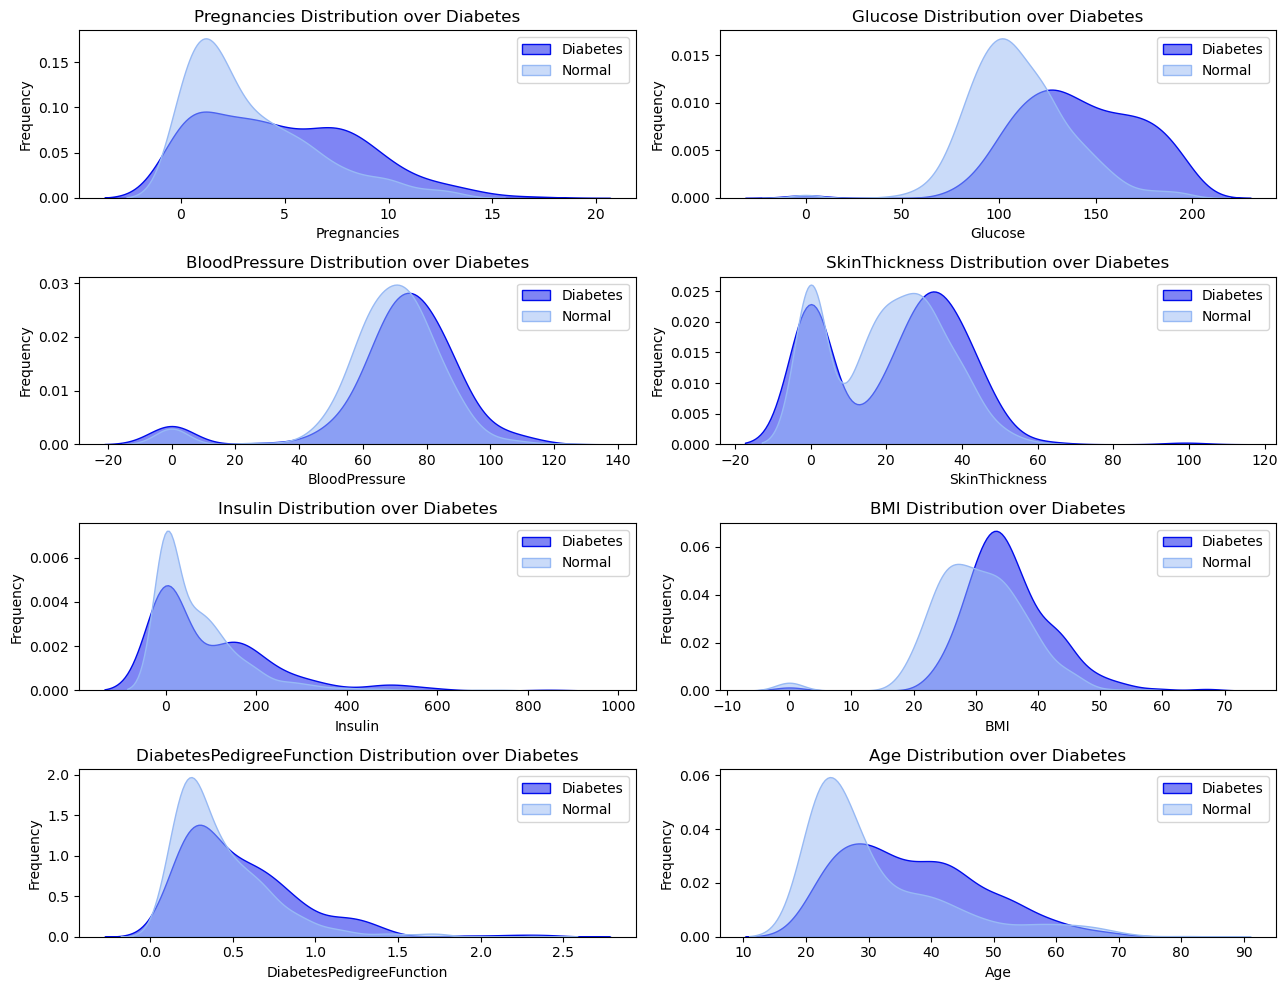

In [9]:
fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols=2, figsize=(13, 10))

for idx, column in enumerate(df.drop(columns = 'Outcome')):
    
    row_idx = idx // 2
    col_idx = idx % 2
    
    sns.kdeplot(df[df["Outcome"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="Diabetes", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["Outcome"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="Normal", ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Diabetes")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

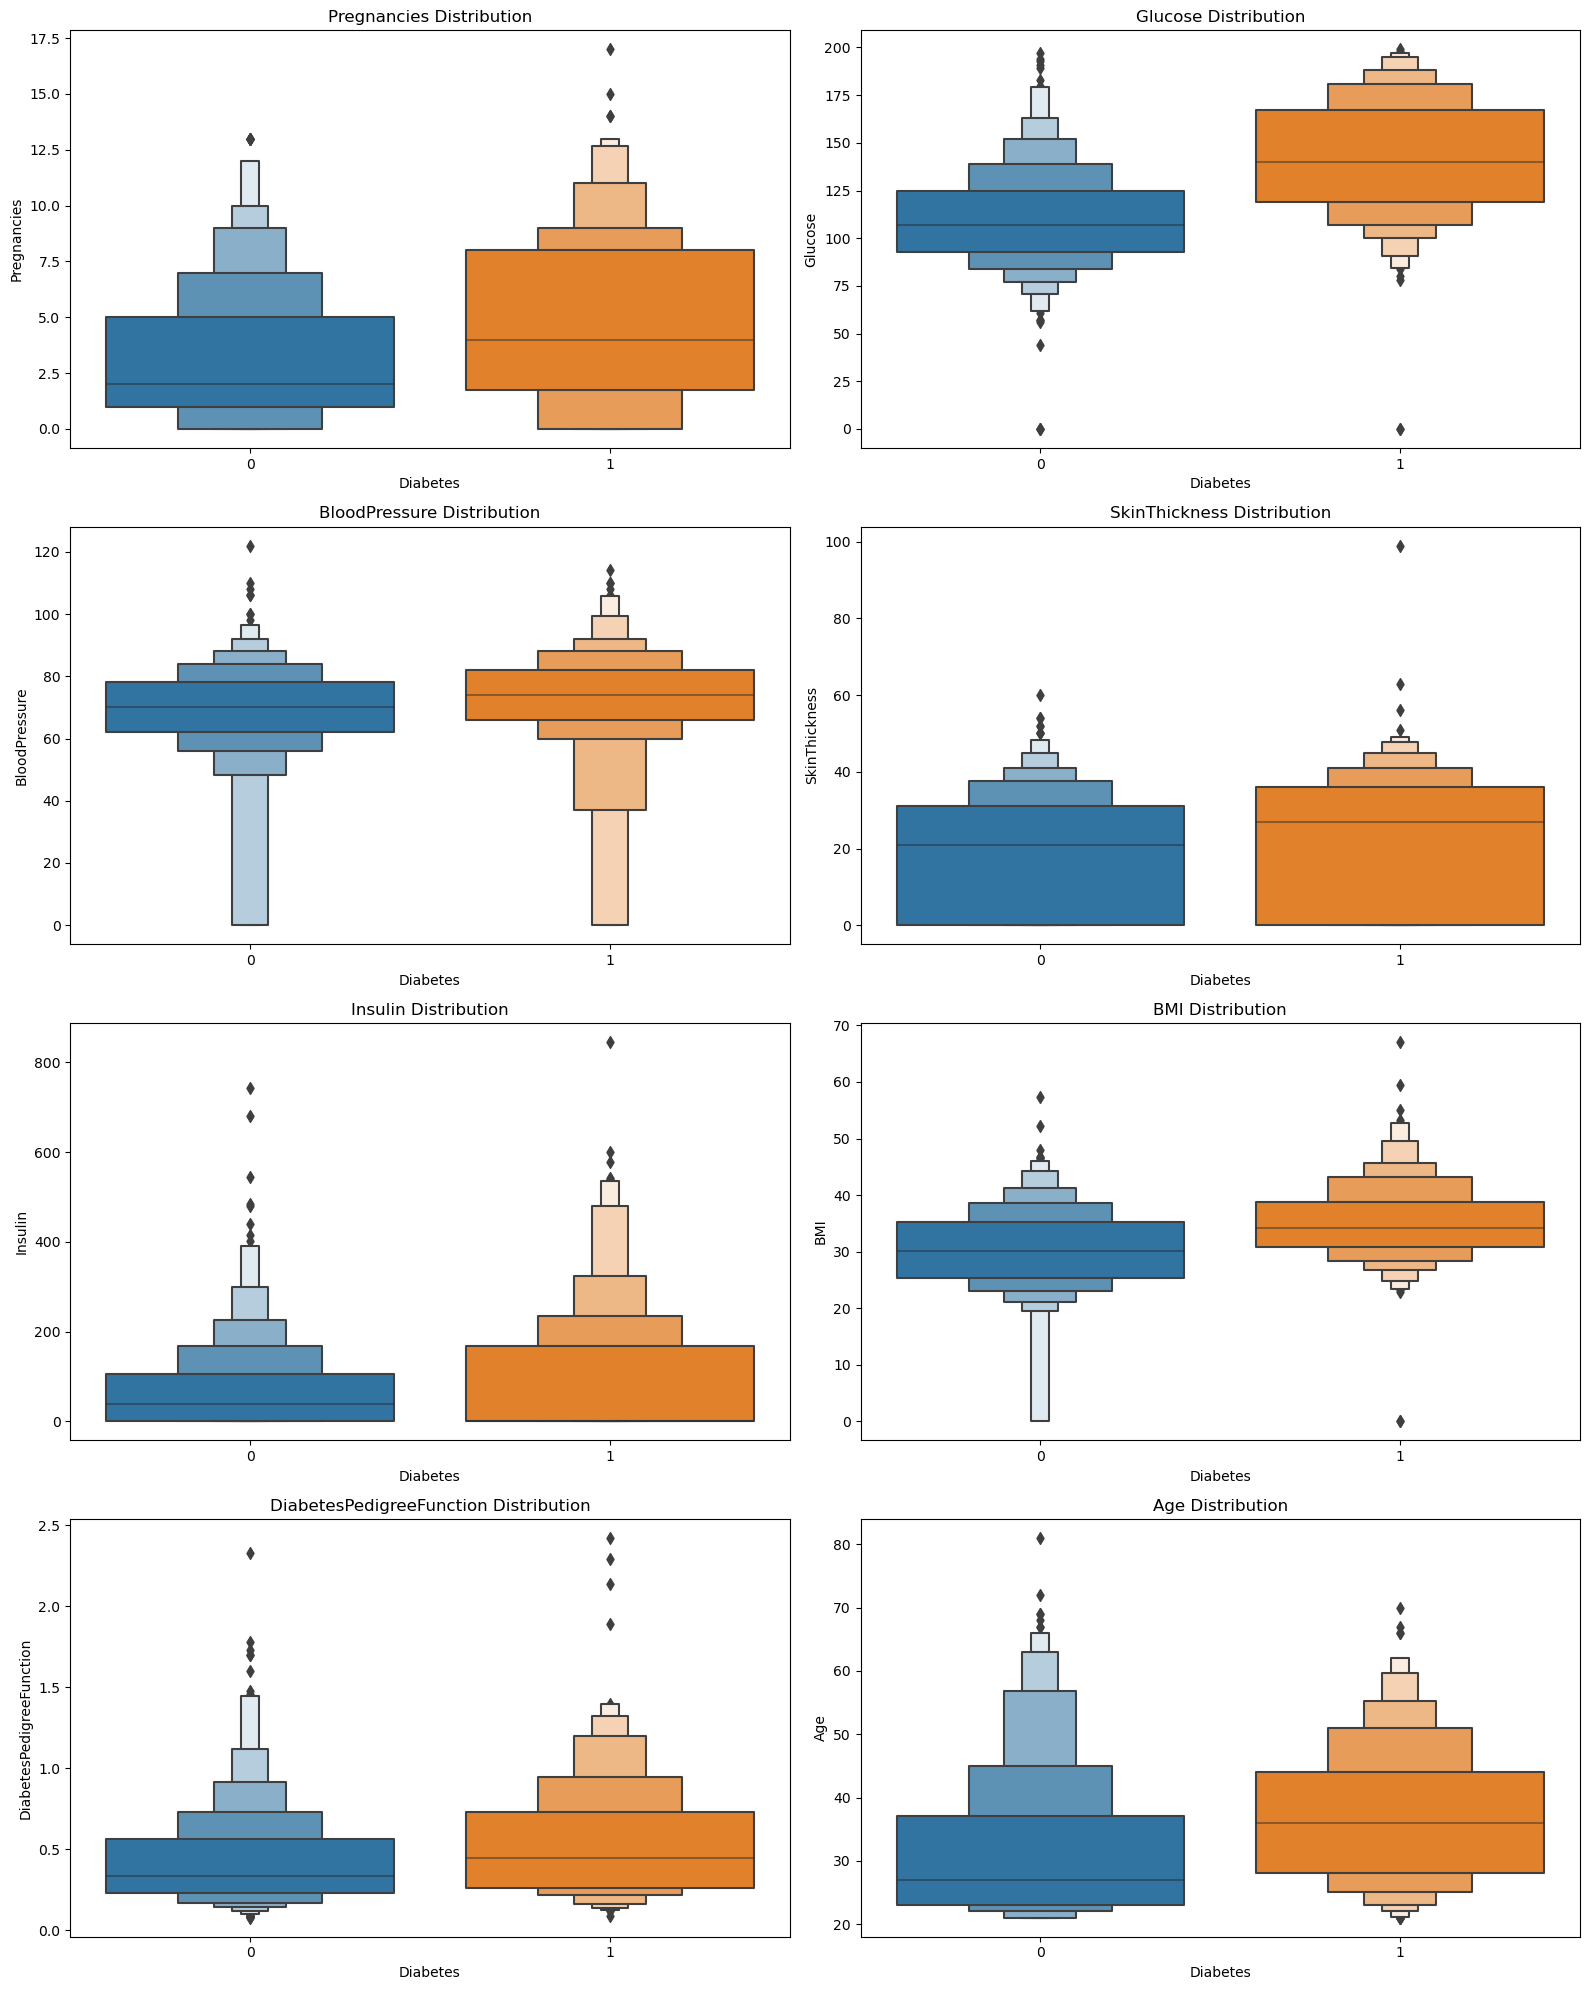

In [10]:
fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols=2, figsize=(16, 20))

for idx, column in enumerate(df.drop(columns = 'Outcome')):
    row_idx = idx // 2
    col_idx = idx % 2
    
    sns.boxenplot( x='Outcome' , y= column , data=df, ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel("Diabetes")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

In [11]:

# Outlier Equation
def outlier_thresholds (dataframe, column, q1=0.25, q3=0.75) :
    quartile1 = dataframe[column].quantile(q1)
    quartile3 = dataframe[column].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

# Checking Outliers
def check_outlier(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    outliers = (dataframe[column] > up_limit) | (dataframe[column] < low_limit)
    if outliers.any():
        return True
    else:
        return False

# Removing the outliers
def replace_with_thresholds (dataframe, column) :
    low_limit , up_limit = outlier_thresholds(dataframe, column)
    dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
    dataframe.loc[(dataframe[column] > up_limit), column] = up_limit

In [12]:
for column in (df.drop(columns = 'Outcome').columns):
    replace_with_thresholds(df, column)
    print(column, check_outlier(df, column))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


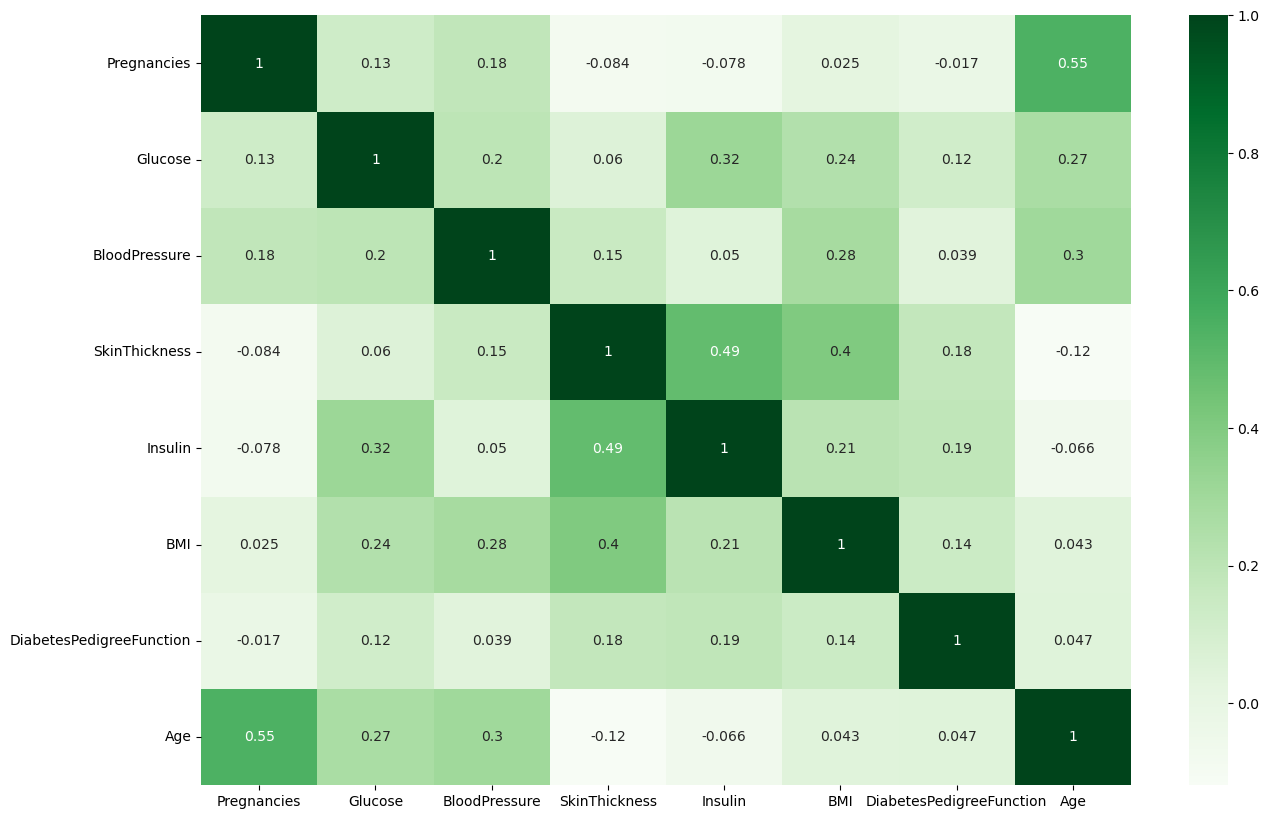

In [13]:
corr = df.drop(columns= 'Outcome').corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [14]:
x1=df[df['Outcome']==1]
x2=df[df['Outcome']==0]

In [15]:
x2=x2.sample(x1.shape[0])

In [16]:
df1=pd.concat([x1,x2],axis=0)

In [17]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.000,33.6,0.627,50.0,1
2,8.0,183.0,64,0,0.000,23.3,0.672,32.0,1
4,0.0,137.0,40,35,168.000,43.1,1.200,33.0,1
6,3.0,78.0,50,32,88.000,31.0,0.248,26.0,1
8,2.0,197.0,70,45,318.125,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...,...
705,6.0,80.0,80,36,0.000,39.8,0.177,28.0,0
587,6.0,103.0,66,0,0.000,24.3,0.249,29.0,0
729,2.0,92.0,52,0,0.000,30.1,0.141,22.0,0
21,8.0,99.0,84,0,0.000,35.4,0.388,50.0,0


In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X = df.drop(columns = 'Outcome')
target = df['Outcome']
scaler =  StandardScaler()
X = scaler.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [20]:
logistic = linear_model.LogisticRegression(penalty = None,solver='lbfgs', max_iter=10000)


In [21]:
logistic.fit(X_train,y_train)
y1=logistic.predict(X_test)

In [22]:
logistic.coef_

array([[ 0.20131754,  1.10954002, -0.26041295,  0.04007578, -0.230287  ,
         0.79319883,  0.28890342,  0.4554638 ]])

In [23]:
coef = pd.DataFrame(zip(list(df.drop(['Outcome'],axis=1)),list(logistic.coef_[0])),columns = ['column_name','coef'])

In [24]:
coef

,column_name,coef
0,Pregnancies,0.201318
1,Glucose,1.109540
2,BloodPressure,-0.260413
3,SkinThickness,0.040076
4,Insulin,-0.230287
5,BMI,0.793199
6,DiabetesPedigreeFunction,0.288903
7,Age,0.455464


In [25]:
confusion_matrix(y_test, y1)

array([[80, 19],
       [19, 36]], dtype=int64)

In [26]:
X_train

array([[-0.54974605, -1.19151805, -2.51514754, ..., -2.66502269,
        -0.54277666, -1.04982767],
       [ 1.54482147, -0.29313647,  0.79751267, ..., -0.55714255,
         2.59656319,  1.44569096],
       [-0.84896998,  0.57316005, -1.73984409, ..., -0.48617015,
         0.68352797, -0.9637753 ],
       ...,
       [ 1.8440454 , -0.64607209,  1.07944119, ...,  1.91269682,
         2.37232462,  0.41306256],
       [-1.14819391,  0.63733016, -2.51514754, ...,  1.45847349,
        -0.88964569, -0.36140873],
       [-1.14819391,  0.12396926,  1.78426251, ..., -1.36622785,
        -0.68993322, -1.04982767]])

In [27]:
X_st=pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [28]:
Age_new=X_st['Age']
X_new=X_st
X_new['Age_new']=Age_new

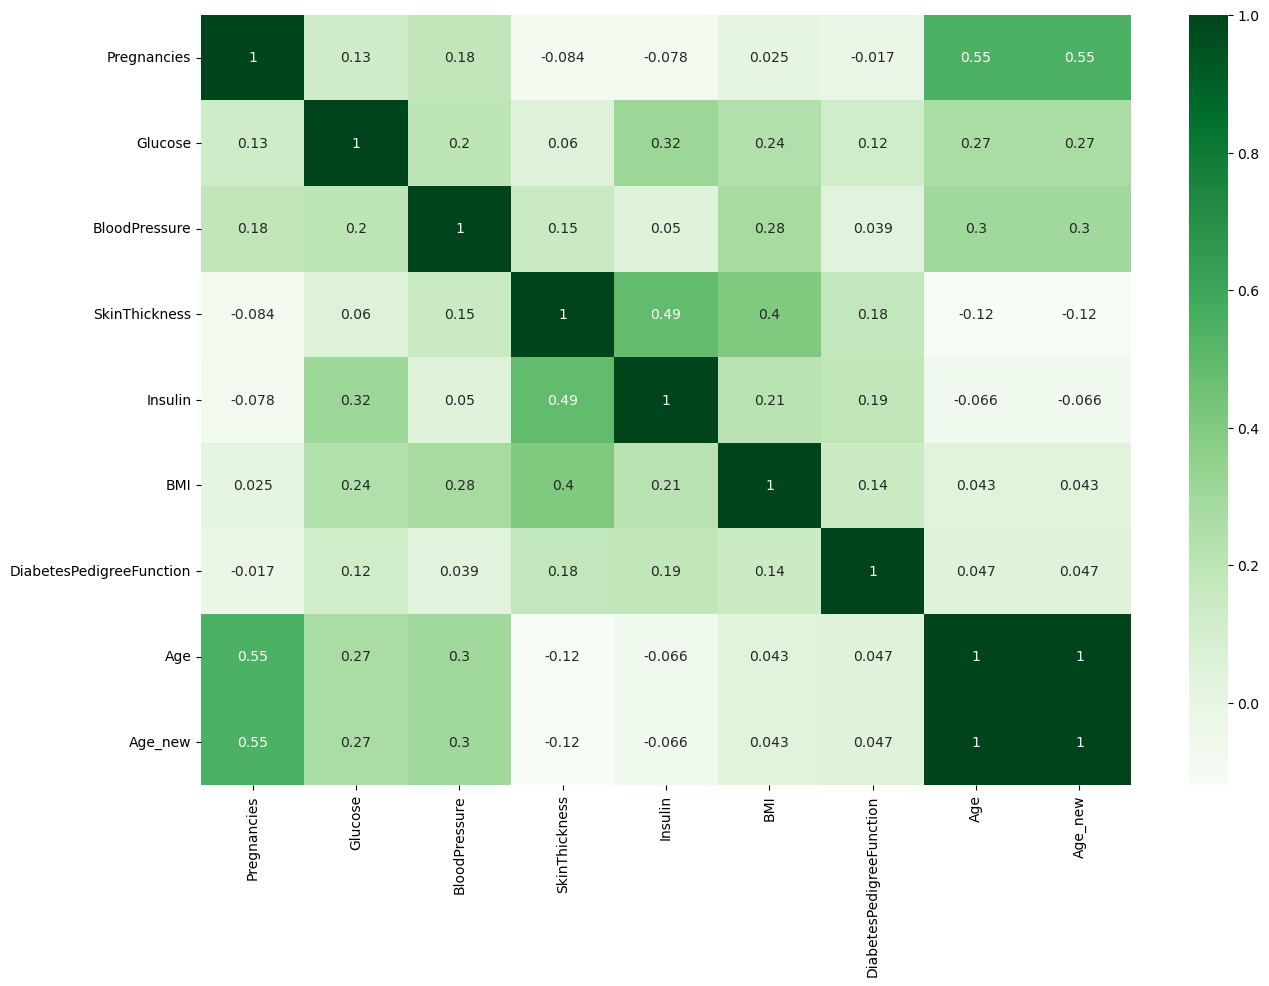

In [29]:
corr = X_new.corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X_new ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 9)
y_train shape: (614,)
X_test shape: (154, 9)
y_test shape: (154,)


In [31]:
logistic1 = linear_model.LogisticRegression(penalty = None,solver='lbfgs', max_iter=10000)
logistic1.fit(X_train,y_train)
y11=logistic1.predict(X_test)
logistic1.coef_

array([[ 0.2013363 ,  1.10955421, -0.26041187,  0.04007401, -0.23029085,
         0.7932026 ,  0.2889061 ,  0.22772235,  0.22772235]])

In [32]:
logistic.coef_

array([[ 0.20131754,  1.10954002, -0.26041295,  0.04007578, -0.230287  ,
         0.79319883,  0.28890342,  0.4554638 ]])

In [33]:
confusion_matrix(y_test, y11)

array([[80, 19],
       [19, 36]], dtype=int64)